#liberaries

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

#Load Data

In [14]:
df = pd.read_excel("OnlineRetail.xlsx")

#Preprocess

In [16]:
print(df.head())
print(df.isnull().sum())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [17]:
df.dropna(inplace=True)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

#K-mean

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


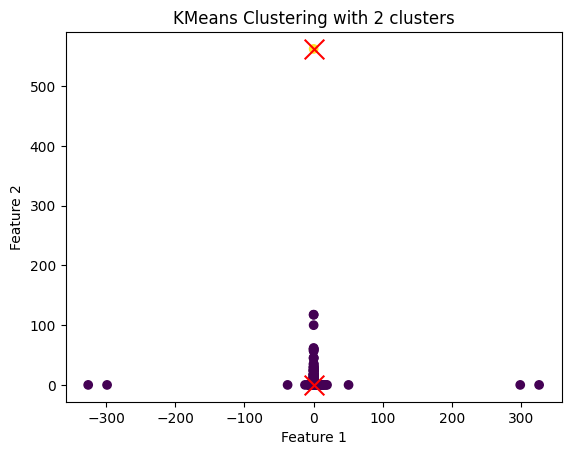

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


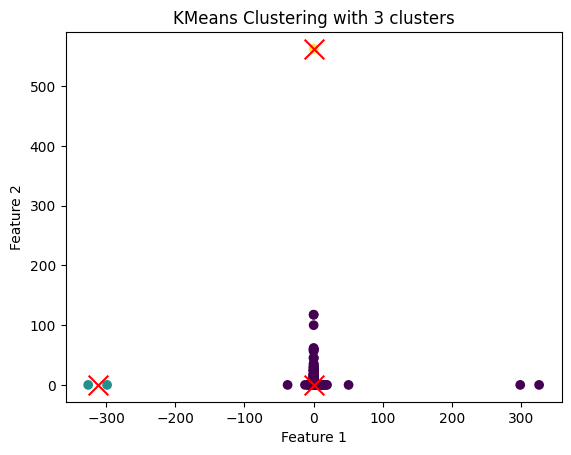

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


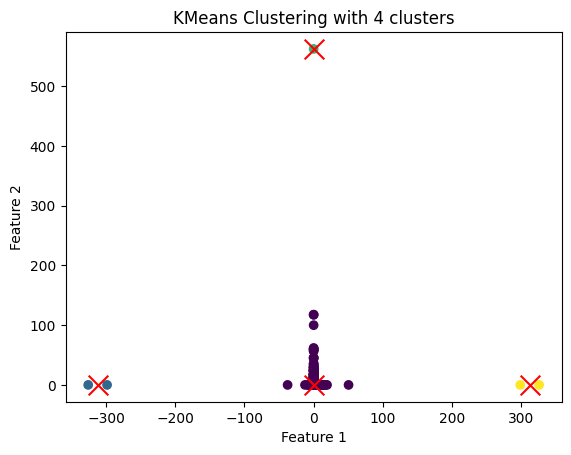

In [18]:
def perform_kmeans_clustering(data, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    centroids = kmeans.cluster_centers_

    plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=200)
    plt.title(f'KMeans Clustering with {num_clusters} clusters')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

features_for_clustering = df[numeric_cols[:2]].values
for num_clusters in [2, 3, 4]:
    perform_kmeans_clustering(features_for_clustering, num_clusters)


#Algomarative Clustering

In [19]:
df = pd.read_excel("OnlineRetail.xlsx")

In [20]:
num_rows = df.shape[0]
sample_size = 10
df = df.sample(n=sample_size, random_state=42)
print(df.head())
print(df.isnull().sum())
df.dropna(inplace=True)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


       InvoiceNo StockCode                       Description  Quantity  \
209268    555200     71459    HANGING JAM JAR T-LIGHT HOLDER        24   
207108    554974     21128                GOLD FISHING GNOME         4   
167085    550972     21086       SET/6 RED SPOTTY PAPER CUPS         4   
471836    576652     22812  PACK 3 BOXES CHRISTMAS PANETTONE         3   
115865    546157     22180                    RETROSPOT LAMP         2   

               InvoiceDate  UnitPrice  CustomerID         Country  
209268 2011-06-01 12:05:00       0.85     17315.0  United Kingdom  
207108 2011-05-27 17:14:00       6.95     14031.0  United Kingdom  
167085 2011-04-21 17:05:00       0.65     14031.0  United Kingdom  
471836 2011-11-16 10:39:00       1.95     17198.0  United Kingdom  
115865 2011-03-10 08:40:00       9.95     13502.0  United Kingdom  
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int6

Function

In [21]:
def agglomerative_clustering(data, n_clusters):
        agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
        labels = agg_clustering.fit_predict(data)
        plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
        plt.title(f'Agglomerative Clustering with {n_clusters} clusters')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()

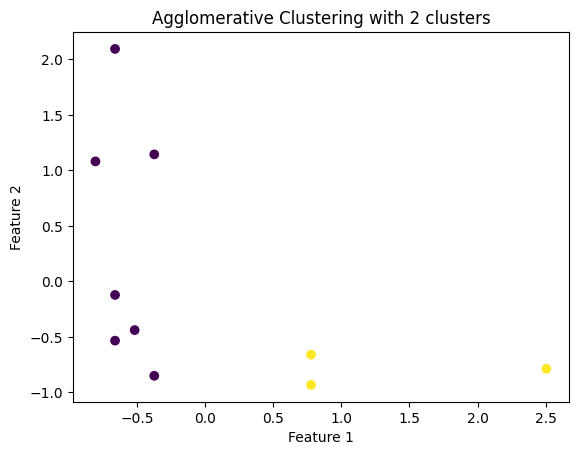

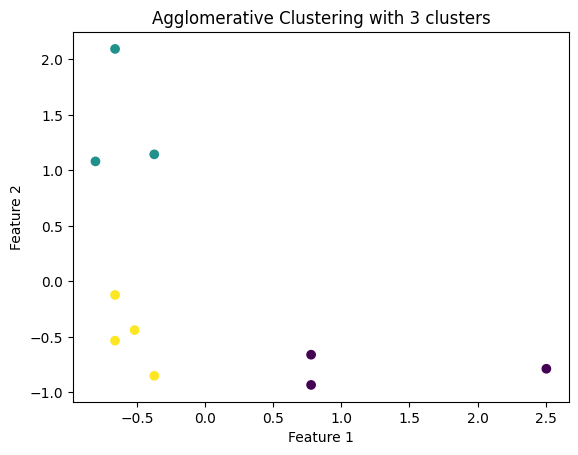

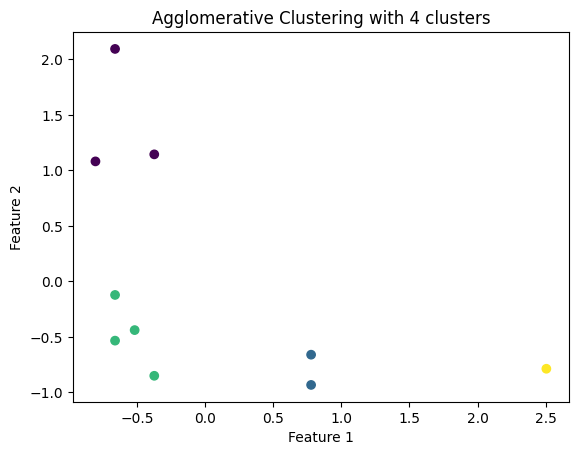

In [22]:
features_for_clustering = df[numeric_cols[:2]].values
for n_clusters in [2, 3, 4]:
    agglomerative_clustering(features_for_clustering, n_clusters)

#ANALYSIS

the Agglomerative Clustering is better than Kmean clustering. if the
because finding the perfect value of is complex.
in KMean We need to specify the number of clusters a priori, which can be challenging if the optimal number of clusters is unknown. while in
Agglomerative Clustering Can automatically determine the number of clusters based on the structure of the data.
So, Agglomerative Clustering is better than Kmean clustering.
because finding the perfect value of is complex.
on the other hand, if the dataset is large Agglomerative clustering is not good in the above the data is large kmean is better than Agglomerative Clustering because computationally expensive for large datasets.